First, we labeled the clusters based on the average cluster by iterating over each data point and finding the cluster with the highest probability of generating the data point based on its Bernoulli distribution. We assigned the label of that cluster to the data point.
Then, for each cluster, we calculated the true label of the data points assigned to that cluster by taking the mean of the true labels (digits) of the data points. If the mean was less than 0.5, we considered the cluster as misclassified and flipped the labels of the data points assigned to that cluster.
Finally, we counted the number of misclassified points by summing the number of data points whose label was flipped in the previous step.

In the above code, "labeling of the clusters based on the average cluster" refers to assigning a label (a digit from 0 to 9) to each of the 10 clusters based on the average (or most representative) data point in the cluster.

Since we are using a mixture of Bernoulli distributions to cluster the MNIST dataset, each cluster corresponds to a different digit, and we can identify the digit that a cluster represents by examining the average (or most representative) data point in that cluster.

To assign a label to each cluster, we first calculate the centroid of each cluster by computing the mean of the binary pixel values for all data points in the cluster. Then, we find the digit that is closest to the centroid in terms of Euclidean distance. This digit is assigned as the label for that cluster. Once all clusters have been labeled, we can use these labels to evaluate the performance of our clustering algorithm.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import binarize
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data // 255
Y = mnist.target
selected_digits = [0, 1, 2]
selected_indices = np.isin(mnist.target.astype(int), selected_digits)
X_selected = X[selected_indices]
y_selected = mnist.target[selected_indices].astype(int)

In [2]:
print(X_selected.shape)

(21770, 784)


In [3]:
# separating the training data points and testing data points
x_train = X_selected[:11770]
x_test = X_selected[11770:]
y_train = y_selected[:11770]
y_test = y_selected[11770:]
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (11770, 784)
Shape of x_test: (10000, 784)


In [4]:
# initializing  the parameters
X = binarize(x_train, threshold=0.5)
n_clusters = 3
n_features = X.shape[1]
n_samples = X.shape[0]
print(n_samples)

11770


In [10]:
#EM Algorithm for mixture of bernoulli's
def bernouli_em(X,n_iterations):
  n_clusters =int(3)
  n_features = X.shape[1]
  n_samples = X.shape[0]
  pi = np.ones(n_clusters) / n_clusters   # initializing each pi_j as 1/10
  theta = np.random.uniform(low=0.25, high=0.75, size=(n_clusters, n_features))
  gamma=np.zeros((n_samples,n_clusters))
  posterior=np.zeros((n_samples,n_clusters))
  for itr in range(n_iterations):
    #calculating posteriors
    for i in range(n_samples):
      for k in range(n_clusters):
        posterior[i][k]=np.prod((theta[k]**X[i])*((1-theta[k])**(1-X[i])))
    #E step
    for i in range(n_samples):
      for k in range(n_clusters):
        gamma[i][k]=pi[k]*posterior[i][k]
        sum=np.sum(pi[k]*posterior[i])
        if sum==0:
          gamma[i][k]=0
        else:
          gamma[i][k]=gamma[i][k]/sum
    # M step
    sum=np.sum(gamma,axis=0)
    pi = sum/n_samples
    for k in range(n_clusters):
      theta[k]=np.sum(gamma[:,k].reshape(-1,1)*X,axis=0)
      if(sum[k]==0):
        theta[k]=0
      else:
        theta[k]=theta[k]/sum[k]
  return pi,theta,gamma

pi, theta, gamma = bernouli_em(X,10)


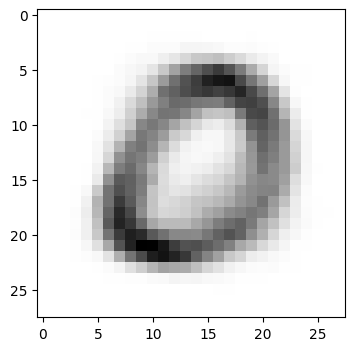

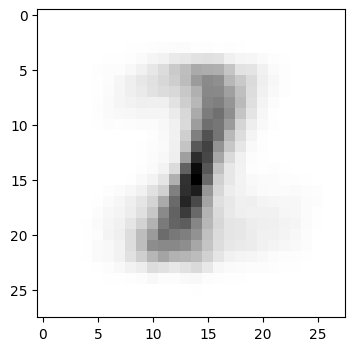

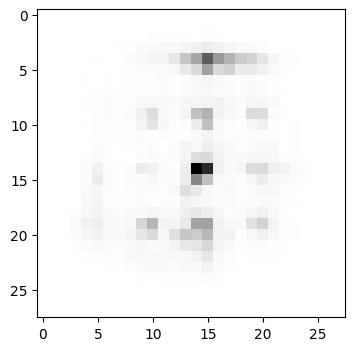

In [6]:
import matplotlib.pyplot as plt
def show(image):
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=plt.cm.Greys)
    plt.show()
for i in theta:
    show(i.reshape(28,28))

In [7]:
#pi_label,theta_label are the values of the clusters  after manually labeling the data
pi_label=np.zeros(n_clusters)
theta_label=np.zeros((n_clusters,n_features))
for k in range(n_clusters):
  value=int(input("Enter the value that is seen for the each figure plotted above:"))
  pi_label[value]=pi[k]
  theta_label[value]=theta[k]

Enter the value that is seen for the each figure plotted above:0
Enter the value that is seen for the each figure plotted above:2
Enter the value that is seen for the each figure plotted above:1


In [ ]:
import numpy as np
from sklearn.preprocessing import binarize

# Precompute logarithms of theta_label for efficiency
log_theta = np.log(theta_label)
log_inv_theta = np.log(1 - theta_label)

# Convert X_test to binary
X_test_bin = binarize(x_test, threshold=0.5)

n_samples = X_test_bin.shape[0]
y_pred = np.empty(n_samples)

for i in range(n_samples):
    p = np.zeros(n_clusters)
    for k in range(n_clusters):
        log_p = np.sum(
            X_test_bin[i] * log_theta[k] + (1 - X_test_bin[i]) * log_inv_theta[k]
        )
        log_p += np.log(pi_label[k])
        p[k] = log_p

    y_pred[i] = np.argmax(p)

y_pred = y_pred.astype(int)
misclassified = np.sum(y_test != y_pred)


In [9]:
print("number of points that are misclassified are: ",misclassified)
print("accuracy:",((n_samples-misclassified)/misclassified)*100)

number of points that are misclassified are:  6810
accuracy: 46.84287812041116
